# Import

In [1]:
# ============================================
# LSTM Hyperparameter Optimization with Monarch Butterfly Algorithm (NiaPy) - Enhanced
# ============================================
# Requirements:
# pip install niapy tensorflow scikit-learn pandas numpy

import os
import time
import json
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Reshape
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Monarch Butterfly Optimization
from niapy.algorithms.basic import MonarchButterflyOptimization
from niapy.task import Task
from niapy.problems import Problem

# prompt: import essential packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
#import torch
from sklearn.preprocessing import StandardScaler, LabelEncoder # Atau OneHotEncoder
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem # Untuk MACCS Keys

print("Packages imported successfully.")

2025-10-16 23:59:23.450010: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-16 23:59:23.851087: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-16 23:59:25.713879: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


Packages imported successfully.


In [2]:
data = pd.read_csv('/home/dito-adistya/Dito/TA/Coding/LSTM-MBA/data/full/dataFP.csv')
data

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,acvalue,categories
0,44244736,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0030,inhibitor
1,44244911,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0035,inhibitor
2,44245235,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0047,inhibitor
3,10451021,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0090,inhibitor
4,44245073,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0180,inhibitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,145958114,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100.0000,neutral
632,145950639,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100.0000,neutral
633,3168508,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100.0000,neutral
634,145952863,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,119.1000,neutral


In [ ]:
X = data.iloc[:, 1:882].values  
y = data['categories'].values
print(X)
print(y)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
['inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor'
 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor'
 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor'
 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor'
 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor'
 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor'
 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor'
 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor'
 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor'
 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor'
 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor'
 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor' 'inhibitor'
 'in

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)


In [5]:
import numpy as np
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:


tf.random.set_seed(42)
np.random.seed(42)

assert 'X_train' in globals() and 'y_train' in globals(), "Define X_train, y_train, X_test, y_test before running."

LOG_DIR = "mbo_logs"
os.makedirs(LOG_DIR, exist_ok=True)
eval_log_csv = os.path.join(LOG_DIR, "mbo_eval_log.csv")


pd.DataFrame(columns=[
    "eval_idx", "n_layers", "units", "dropout", "lr", "optimizer",
    "batch_size", "l2", "activation", "val_auc", "elapsed_sec", "note"
]).to_csv(eval_log_csv, index=False)

def decode_solution(x):
    n_layers = int(np.clip(round(x[0]), 1, 3))
    u1 = int(np.clip(round(x[1]), 16, 256))
    u2 = int(np.clip(round(x[2]), 16, 256))
    dropout = float(np.clip(x[3], 0.1, 0.7))
    lr = float(10 ** np.clip(x[4], -5, -2))
    opt_idx = int(np.clip(int(round(x[5])), 0, 2))
    batch_idx = int(np.clip(int(round(x[6])), 0, 3))
    l2_val = float(10 ** np.clip(x[7], -9, -2))
    act_idx = int(np.clip(int(round(x[8])), 0, 2))

    optim_map = {0: 'adam', 1: 'rmsprop', 2: 'nadam'}
    batch_map = {0: 4, 1: 8, 2: 16, 3: 32}
    act_map = {0: 'tanh', 1: 'relu', 2: 'selu'}

    if l2_val < 1e-8:
        l2_val = 0.0

    return {
        'n_layers': n_layers,
        'units': (u1, u2),
        'dropout': dropout,
        'lr': lr,
        'optimizer': optim_map[opt_idx],
        'batch_size': batch_map[batch_idx],
        'l2': float(l2_val),
        'activation': act_map[act_idx]
    }

def build_lstm_dynamic(params, input_shape):
    model = Sequential()
    model.add(tf.keras.Input(shape=input_shape))
    model.add(Reshape((1, input_shape[0])))

    kr = l2(params['l2']) if params['l2'] > 0 else None
    n_layers = params['n_layers']
    u1, u2 = params['units']
    act = params['activation']

    if n_layers == 1:
        model.add(LSTM(u1, activation=act, return_sequences=False, kernel_regularizer=kr))
    elif n_layers == 2:
        model.add(LSTM(u1, activation=act, return_sequences=True, kernel_regularizer=kr))
        model.add(LSTM(u2, activation=act, return_sequences=False, kernel_regularizer=kr))
    else:  
        model.add(LSTM(u1, activation=act, return_sequences=True, kernel_regularizer=kr))
        model.add(LSTM(u2, activation=act, return_sequences=True, kernel_regularizer=kr))
        model.add(LSTM(max(16, u2 // 2), activation=act, return_sequences=False, kernel_regularizer=kr))

    model.add(Dropout(params['dropout']))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_and_eval(params, X_train_local, y_train_local, epochs=8, val_split=0.15, verbose=0, eval_idx=None, max_evals=None):
    start = time.time()
    n_layers = params['n_layers']
    units = params['units']
    dropout_rate = params['dropout']
    lr = params['lr']
    opt_name = params['optimizer']
    l2_reg = params['l2']
    batch_size = params['batch_size']
    activation = params['activation']

    
    if opt_name == 'adam':
        optimizer = Adam(learning_rate=lr)
    elif opt_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=lr)
    else:
        optimizer = Nadam(learning_rate=lr)

    
    model = build_lstm_dynamic(params, (X_train_local.shape[1], 1))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])

    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=0)

    history = None
    val_auc = 0.0
    note = ""
    try:
        history = model.fit(X_train_local, y_train_local,
                            validation_split=val_split, epochs=epochs,
                            batch_size=batch_size, callbacks=[es], verbose=verbose)
        if history and 'val_auc' in history.history:
            val_auc = float(history.history['val_auc'][-1])
        else:
            note += "No val_auc in history. "
            
            loss, auc = model.evaluate(X_train_local, y_train_local, verbose=0)
            val_auc = float(auc)
            note += f"Used training AUC instead: {val_auc:.4f}. "
    except Exception as e:
        note = f"error:{e}"
        val_auc = 0.0

    tf.keras.backend.clear_session()
    elapsed = time.time() - start

    log_row = {
        "eval_idx": eval_idx if isinstance(eval_idx, (int, np.integer)) else str(eval_idx),
        "n_layers": n_layers,
        "units": json.dumps(units),
        "dropout": float(dropout_rate),
        "lr": float(lr),
        "optimizer": opt_name,
        "batch_size": int(batch_size),
        "l2": float(l2_reg),
        "activation": activation,
        "val_auc": float(val_auc),
        "elapsed_sec": float(elapsed),
        "note": note
    }
    pd.DataFrame([log_row]).to_csv(eval_log_csv, mode='a', header=False, index=False)

    # Print lightweight progress line
    if eval_idx is not None and max_evals is not None:
        print(f"[Eval {eval_idx}/{max_evals}] layers={n_layers} act={activation} opt={opt_name} lr={lr:.2e} bs={batch_size} l2={l2_reg:.0e} -> val_auc={val_auc:.4f} (took {elapsed:.1f}s)")

    return float(val_auc)

class LSTMHyperProblem(Problem):
    def __init__(self, X_train_local, y_train_local, max_evals=100, epochs_small=8):
        lower = [1, 16, 16, 0.1, -5.0, 0.0, 0.0, -9.0, 0.0]
        upper = [3, 256, 256, 0.7, -2.0, 2.0, 3.0, -2.0, 2.0]
        super().__init__(dimension=9, lower=lower, upper=upper)
        self.X_train_local = X_train_local
        self.y_train_local = y_train_local
        self.epochs_small = epochs_small
        self.eval_count = 0
        self.max_evals = max_evals

    def _evaluate(self, x):
        self.eval_count += 1
        params = decode_solution(x)
        try:
            val_auc = build_and_eval(params, self.X_train_local, self.y_train_local,
                                     epochs=self.epochs_small, val_split=0.15,
                                     verbose=0, eval_idx=self.eval_count, max_evals=self.max_evals)
        except Exception as e:
            print(f"[Eval {self.eval_count}] ERROR during eval: {e}")
            val_auc = 0.0
        return -val_auc  # minimize negative AUC

# Run optimization

# Use subset of training data to speed up optimization
take_frac = 1.0 # Increased from 0.6, adjust as needed
idx = np.random.choice(len(X_train), size=int(len(X_train) * take_frac), replace=False)
X_train_sub = X_train[idx]
y_train_sub = y_train[idx]

# Settings - Increased from 10 for better search
MAX_EVALS = 120 # Adjust as needed, e.g., 60, 120
POP_SIZE = 10

problem = LSTMHyperProblem(X_train_sub, y_train_sub, max_evals=MAX_EVALS, epochs_small=8)
task = Task(problem=problem, max_evals=MAX_EVALS)
algo = MonarchButterflyOptimization(population_size=POP_SIZE)

print(f"🚀 Starting MBO search: max_evals={MAX_EVALS}, pop_size={POP_SIZE}. Logs -> {eval_log_csv}\n")

try:
    best_x, best_fit = algo.run(task)
except KeyboardInterrupt:
    print("Optimization interrupted by user. Using best-so-far from task.")
    best_x = task.best_solution
    best_fit = task.best_fitness

best_params = decode_solution(best_x)

print("\n=== 🦋 MBO Result ===")
print("Best Params:", best_params)
print("Best Validation AUC (approx):", -best_fit)

# ===============================
# Retrain final model
# ===============================
print("\n🎯 Retraining final model on full training set with best hyperparams...")
final_params = best_params
final_epochs = 50  # longer training for final model

# IMPORTANT: Call without eval_idx="final" to avoid logging issues and simplify final train
# We still want verbose=1 to see progress during final training
final_val_auc = build_and_eval(final_params, X_train, y_train,
                               epochs=final_epochs, val_split=0.15, verbose=1)
                               

print("Final short validation AUC (from build_and_eval):", final_val_auc)

# Build & train final model for real evaluation on X_test
model = build_lstm_dynamic(final_params, (X_train.shape[1], 1))
if final_params['optimizer'] == 'adam':
    opt = Adam(learning_rate=final_params['lr'])
elif final_params['optimizer'] == 'rmsprop':
    opt = RMSprop(learning_rate=final_params['lr'])
else:
    opt = Nadam(learning_rate=final_params['lr'])

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', 'AUC'])
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
model.fit(X_train, y_train, validation_split=0.15, epochs=100, batch_size=final_params['batch_size'], callbacks=[es], verbose=1)

loss, acc, auc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Results: Loss={loss:.4f}, Acc={acc:.4f}, AUC={auc:.4f}")

model.save('mbo_best_lstm_fp_model.h5')
print("💾 Saved final model to mbo_best_lstm_fp_model.h5")

🚀 Starting MBO search: max_evals=120, pop_size=10. Logs -> mbo_logs/mbo_eval_log.csv



2025-10-15 16:02:01.591144: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


[Eval 1/120] layers=2 act=relu opt=nadam lr=1.32e-05 bs=8 l2=4e-05 -> val_auc=0.7414 (took 7.2s)
[Eval 2/120] layers=2 act=relu opt=nadam lr=1.08e-05 bs=8 l2=2e-08 -> val_auc=0.7984 (took 7.6s)
[Eval 3/120] layers=3 act=relu opt=rmsprop lr=3.74e-05 bs=32 l2=2e-07 -> val_auc=0.5000 (took 5.2s)
[Eval 4/120] layers=2 act=relu opt=nadam lr=3.08e-05 bs=8 l2=2e-07 -> val_auc=0.7800 (took 9.0s)
[Eval 5/120] layers=2 act=tanh opt=adam lr=6.11e-03 bs=16 l2=1e-07 -> val_auc=0.9520 (took 5.0s)
[Eval 6/120] layers=1 act=relu opt=adam lr=2.14e-04 bs=32 l2=6e-06 -> val_auc=0.8463 (took 3.7s)
[Eval 7/120] layers=2 act=selu opt=rmsprop lr=1.68e-03 bs=8 l2=1e-08 -> val_auc=0.9258 (took 5.8s)
[Eval 8/120] layers=2 act=selu opt=adam lr=8.41e-05 bs=8 l2=8e-05 -> val_auc=0.8847 (took 7.2s)
[Eval 9/120] layers=2 act=relu opt=rmsprop lr=2.06e-05 bs=16 l2=3e-05 -> val_auc=0.7076 (took 5.3s)
[Eval 10/120] layers=2 act=relu opt=rmsprop lr=5.06e-05 bs=8 l2=7e-06 -> val_auc=0.7593 (took 8.7s)
[Eval 11/120] layers


✅ Test Results: Loss=0.5657, Acc=0.8125, AUC=0.8822
💾 Saved final model to mbo_best_lstm_fp_model.h5


In [8]:
# Fix seeds
tf.random.set_seed(42)
np.random.seed(42)

assert 'X_train' in globals() and 'y_train' in globals(), "Define X_train, y_train, X_test, y_test before running."

# ===============================
# Logging setup
# ===============================
LOG_DIR = "mbo_logs"
os.makedirs(LOG_DIR, exist_ok=True)
eval_log_csv = os.path.join(LOG_DIR, "mbo_eval_log.csv")

# init CSV with header - Added 'activation' and 'n_layers'
pd.DataFrame(columns=[
    "eval_idx", "n_layers", "units", "dropout", "lr", "optimizer",
    "batch_size", "l2", "activation", "val_auc", "elapsed_sec", "note"
]).to_csv(eval_log_csv, index=False)

# ===============================
# Decode solution vector -> params
# ===============================
def decode_solution(x):
    n_layers = int(np.clip(round(x[0]), 1, 3))
    u1 = int(np.clip(round(x[1]), 16, 256))
    u2 = int(np.clip(round(x[2]), 16, 256))
    dropout = float(np.clip(x[3], 0.1, 0.7))
    lr = float(10 ** np.clip(x[4], -5, -2))
    opt_idx = int(np.clip(int(round(x[5])), 0, 2))
    batch_idx = int(np.clip(int(round(x[6])), 0, 3))
    l2_val = float(10 ** np.clip(x[7], -9, -2))
    act_idx = int(np.clip(int(round(x[8])), 0, 2))

    optim_map = {0: 'adam', 1: 'rmsprop', 2: 'nadam'}
    batch_map = {0: 4, 1: 8, 2: 16, 3: 32}
    act_map = {0: 'tanh', 1: 'relu', 2: 'selu'}

    if l2_val < 1e-8:
        l2_val = 0.0

    return {
        'n_layers': n_layers,
        'units': (u1, u2),
        'dropout': dropout,
        'lr': lr,
        'optimizer': optim_map[opt_idx],
        'batch_size': batch_map[batch_idx],
        'l2': float(l2_val),
        'activation': act_map[act_idx]
    }

# ===============================
# Build dynamic LSTM
# ===============================
def build_lstm_dynamic(params, input_shape):
    model = Sequential()
    model.add(tf.keras.Input(shape=input_shape))
    model.add(Reshape((1, input_shape[0])))

    kr = l2(params['l2']) if params['l2'] > 0 else None
    n_layers = params['n_layers']
    u1, u2 = params['units']
    act = params['activation']

    # Dynamic layer setup
    if n_layers == 1:
        model.add(LSTM(u1, activation=act, return_sequences=False, kernel_regularizer=kr))
    elif n_layers == 2:
        model.add(LSTM(u1, activation=act, return_sequences=True, kernel_regularizer=kr))
        model.add(LSTM(u2, activation=act, return_sequences=False, kernel_regularizer=kr))
    else:  # 3 layers
        model.add(LSTM(u1, activation=act, return_sequences=True, kernel_regularizer=kr))
        model.add(LSTM(u2, activation=act, return_sequences=True, kernel_regularizer=kr))
        model.add(LSTM(max(16, u2 // 2), activation=act, return_sequences=False, kernel_regularizer=kr))

    model.add(Dropout(params['dropout']))
    model.add(Dense(1, activation='sigmoid'))
    return model

# ===============================
# Train + evaluate function (Enhanced with fallback and safe logging)
# ===============================
def build_and_eval(params, X_train_local, y_train_local, epochs=8, val_split=0.15, verbose=0, eval_idx=None, max_evals=None):
    start = time.time()
    # Extract parameters
    n_layers = params['n_layers']
    units = params['units']
    dropout_rate = params['dropout']
    lr = params['lr']
    opt_name = params['optimizer']
    l2_reg = params['l2']
    batch_size = params['batch_size']
    activation = params['activation']

    # Optimizer selection
    if opt_name == 'adam':
        optimizer = Adam(learning_rate=lr)
    elif opt_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=lr)
    else:
        optimizer = Nadam(learning_rate=lr)

    # Build model
    model = build_lstm_dynamic(params, (X_train_local.shape[1], 1))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])

    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=0)

    history = None
    val_auc = 0.0
    note = ""
    try:
        history = model.fit(X_train_local, y_train_local,
                            validation_split=val_split, epochs=epochs,
                            batch_size=batch_size, callbacks=[es], verbose=verbose)
        # Prefer last val_auc if available
        if history and 'val_auc' in history.history:
            val_auc = float(history.history['val_auc'][-1])
        else:
            # Fallback: evaluate on training data (not ideal for validation, but prevents 0.0)
            # Or just note that val_auc was missing
            note += "No val_auc in history. "
            # Let's evaluate on the training data as a very last resort (though not a true validation score)
            loss, auc = model.evaluate(X_train_local, y_train_local, verbose=0)
            val_auc = float(auc)
            note += f"Used training AUC instead: {val_auc:.4f}. "
    except Exception as e:
        note = f"error:{e}"
        val_auc = 0.0

    tf.keras.backend.clear_session()
    elapsed = time.time() - start

    # Log to CSV - Ensure eval_idx is safe for CSV
    log_row = {
        "eval_idx": eval_idx if isinstance(eval_idx, (int, np.integer)) else str(eval_idx),
        "n_layers": n_layers,
        "units": json.dumps(units),
        "dropout": float(dropout_rate),
        "lr": float(lr),
        "optimizer": opt_name,
        "batch_size": int(batch_size),
        "l2": float(l2_reg),
        "activation": activation,
        "val_auc": float(val_auc),
        "elapsed_sec": float(elapsed),
        "note": note
    }
    pd.DataFrame([log_row]).to_csv(eval_log_csv, mode='a', header=False, index=False)

    # Print lightweight progress line
    if eval_idx is not None and max_evals is not None:
        print(f"[Eval {eval_idx}/{max_evals}] layers={n_layers} act={activation} opt={opt_name} lr={lr:.2e} bs={batch_size} l2={l2_reg:.0e} -> val_auc={val_auc:.4f} (took {elapsed:.1f}s)")

    return float(val_auc)

# ===============================
# Define NiaPy Problem
# ===============================
class LSTMHyperProblem(Problem):
    def __init__(self, X_train_local, y_train_local, max_evals=100, epochs_small=8):
        lower = [1, 16, 16, 0.1, -5.0, 0.0, 0.0, -9.0, 0.0]
        upper = [3, 256, 256, 0.7, -2.0, 2.0, 3.0, -2.0, 2.0]
        super().__init__(dimension=9, lower=lower, upper=upper)
        self.X_train_local = X_train_local
        self.y_train_local = y_train_local
        self.epochs_small = epochs_small
        self.eval_count = 0
        self.max_evals = max_evals

    def _evaluate(self, x):
        self.eval_count += 1
        params = decode_solution(x)
        try:
            val_auc = build_and_eval(params, self.X_train_local, self.y_train_local,
                                     epochs=self.epochs_small, val_split=0.15,
                                     verbose=0, eval_idx=self.eval_count, max_evals=self.max_evals)
        except Exception as e:
            print(f"[Eval {self.eval_count}] ERROR during eval: {e}")
            val_auc = 0.0
        return -val_auc  # minimize negative AUC

# ===============================
# Run optimization
# ===============================
# Use subset of training data to speed up optimization
take_frac = 1.0 # Increased from 0.6, adjust as needed
idx = np.random.choice(len(X_train), size=int(len(X_train) * take_frac), replace=False)
X_train_sub = X_train[idx]
y_train_sub = y_train[idx]

# Settings - Increased from 10 for better search
MAX_EVALS = 180 # Adjust as needed, e.g., 60, 120
POP_SIZE = 15

problem = LSTMHyperProblem(X_train_sub, y_train_sub, max_evals=MAX_EVALS, epochs_small=8)
task = Task(problem=problem, max_evals=MAX_EVALS)
algo = MonarchButterflyOptimization(population_size=POP_SIZE)

print(f"🚀 Starting MBO search: max_evals={MAX_EVALS}, pop_size={POP_SIZE}. Logs -> {eval_log_csv}\n")

try:
    best_x, best_fit = algo.run(task)
except KeyboardInterrupt:
    print("Optimization interrupted by user. Using best-so-far from task.")
    best_x = task.best_solution
    best_fit = task.best_fitness

best_params = decode_solution(best_x)

print("\n=== 🦋 MBO Result ===")
print("Best Params:", best_params)
print("Best Validation AUC (approx):", -best_fit)

# ===============================
# Retrain final model
# ===============================
print("\n🎯 Retraining final model on full training set with best hyperparams...")
final_params = best_params
final_epochs = 50  # longer training for final model

# IMPORTANT: Call without eval_idx="final" to avoid logging issues and simplify final train
# We still want verbose=1 to see progress during final training
final_val_auc = build_and_eval(final_params, X_train, y_train,
                               epochs=final_epochs, val_split=0.15, verbose=1)
                               # Removed: eval_idx="final", max_evals=MAX_EVALS)

print("Final short validation AUC (from build_and_eval):", final_val_auc)

# Build & train final model for real evaluation on X_test
model = build_lstm_dynamic(final_params, (X_train.shape[1], 1))
if final_params['optimizer'] == 'adam':
    opt = Adam(learning_rate=final_params['lr'])
elif final_params['optimizer'] == 'rmsprop':
    opt = RMSprop(learning_rate=final_params['lr'])
else:
    opt = Nadam(learning_rate=final_params['lr'])

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', 'AUC'])
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
model.fit(X_train, y_train, validation_split=0.15, epochs=100, batch_size=final_params['batch_size'], callbacks=[es], verbose=1)

loss, acc, auc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Results: Loss={loss:.4f}, Acc={acc:.4f}, AUC={auc:.4f}")

model.save('mbo_best_lstm_fp_model.h5')
print("💾 Saved final model to mbo_best_lstm_fp_model.h5")

🚀 Starting MBO search: max_evals=180, pop_size=15. Logs -> mbo_logs/mbo_eval_log.csv

[Eval 1/180] layers=1 act=relu opt=rmsprop lr=6.95e-03 bs=4 l2=4e-07 -> val_auc=0.8567 (took 8.7s)
[Eval 2/180] layers=3 act=relu opt=nadam lr=1.51e-05 bs=16 l2=1e-06 -> val_auc=0.5000 (took 9.1s)
[Eval 3/180] layers=3 act=selu opt=nadam lr=5.87e-04 bs=32 l2=2e-03 -> val_auc=0.9374 (took 8.1s)
[Eval 4/180] layers=1 act=tanh opt=rmsprop lr=3.52e-04 bs=8 l2=3e-05 -> val_auc=0.8800 (took 7.8s)
[Eval 5/180] layers=2 act=relu opt=rmsprop lr=8.64e-03 bs=4 l2=2e-08 -> val_auc=0.8618 (took 9.3s)
[Eval 6/180] layers=1 act=selu opt=adam lr=1.06e-03 bs=32 l2=5e-05 -> val_auc=0.9282 (took 5.1s)
[Eval 7/180] layers=2 act=tanh opt=adam lr=1.36e-04 bs=8 l2=0e+00 -> val_auc=0.8843 (took 7.9s)
[Eval 8/180] layers=2 act=relu opt=nadam lr=5.04e-05 bs=32 l2=6e-08 -> val_auc=0.7331 (took 6.8s)
[Eval 9/180] layers=2 act=tanh opt=nadam lr=1.46e-04 bs=8 l2=7e-04 -> val_auc=0.8933 (took 14.4s)
[Eval 10/180] layers=2 act=relu 


✅ Test Results: Loss=0.5348, Acc=0.7578, AUC=0.8588
💾 Saved final model to mbo_best_lstm_fp_model.h5


🚀 Starting MBO search: max_evals=100, pop_size=10. Logs -> mbo_logs/mbo_eval_log.csv



2025-10-16 23:59:56.001064: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


[Eval 1/100] layers=1 act=tanh opt=rmsprop lr=2.19e-04 bs=32 l2=3e-08 -> val_auc=0.8600 (took 4.8s)
[Eval 2/100] layers=2 act=selu opt=adam lr=3.95e-04 bs=8 l2=4e-05 -> val_auc=0.9201 (took 9.9s)
[Eval 3/100] layers=2 act=relu opt=rmsprop lr=1.34e-04 bs=16 l2=2e-06 -> val_auc=0.7844 (took 6.4s)
[Eval 4/100] layers=2 act=relu opt=rmsprop lr=1.28e-04 bs=4 l2=3e-05 -> val_auc=0.8472 (took 9.3s)
[Eval 5/100] layers=2 act=selu opt=rmsprop lr=4.41e-04 bs=8 l2=2e-03 -> val_auc=0.9213 (took 5.5s)
[Eval 6/100] layers=3 act=relu opt=nadam lr=5.64e-03 bs=4 l2=7e-06 -> val_auc=0.8576 (took 17.0s)
[Eval 7/100] layers=2 act=relu opt=nadam lr=6.97e-04 bs=32 l2=2e-03 -> val_auc=0.9050 (took 5.3s)
[Eval 8/100] layers=2 act=selu opt=adam lr=2.94e-05 bs=8 l2=0e+00 -> val_auc=0.7813 (took 6.1s)
[Eval 9/100] layers=2 act=relu opt=rmsprop lr=1.92e-05 bs=16 l2=4e-04 -> val_auc=0.7383 (took 7.0s)
[Eval 10/100] layers=3 act=tanh opt=rmsprop lr=5.81e-03 bs=8 l2=8e-06 -> val_auc=0.9203 (took 11.9s)
[Eval 11/100]

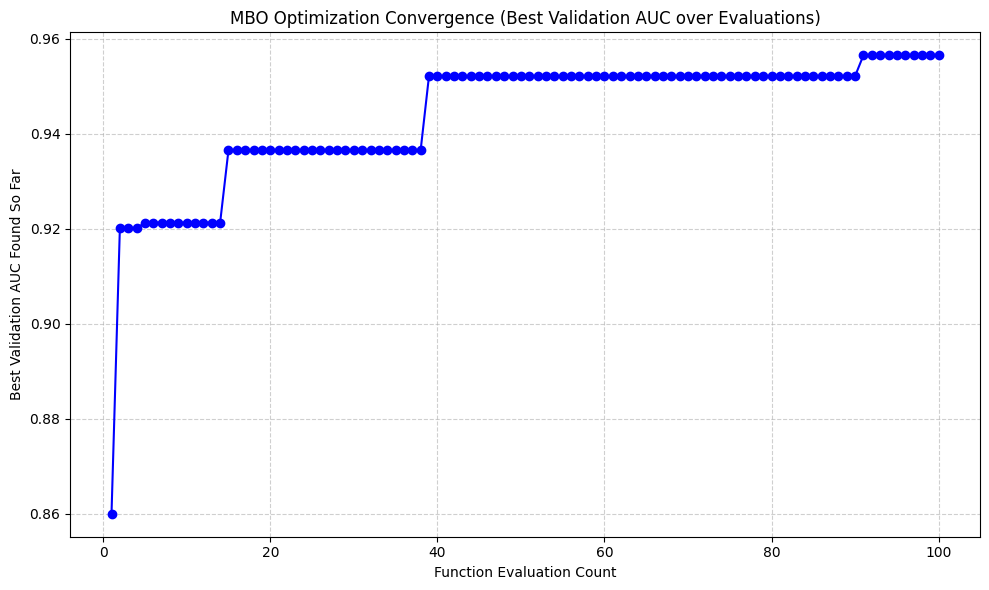

💾 Convergence plot saved to mbo_logs/mbo_convergence_plot.png

🎯 Retraining final model on full training set with best hyperparams...
Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - AUC: 0.6200 - loss: 0.6743 - val_AUC: 0.7398 - val_loss: 0.6240
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - AUC: 0.7959 - loss: 0.5500 - val_AUC: 0.7991 - val_loss: 0.5664
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - AUC: 0.8826 - loss: 0.4274 - val_AUC: 0.8198 - val_loss: 0.6049
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - AUC: 0.9156 - loss: 0.3682 - val_AUC: 0.8354 - val_loss: 0.6432
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - AUC: 0.9351 - loss: 0.3218 - val_AUC: 0.8330 - val_loss: 0.7478
Final short validation AUC (from build_and_eval): 0.8902461528778076
Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - AUC: 0.6358 - accuracy: 0.5986 - loss: 0.6728 - val_AUC: 0.7375 - val_accuracy: 0.6623 - val_loss: 0.6251
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step 


✅ Test Results: Loss=0.5895, Acc=0.6641, AUC=0.8418
💾 Saved final model to mbo_best_lstm_fp_model.h5


In [7]:
# Fix seeds
tf.random.set_seed(42)
np.random.seed(42)

assert 'X_train' in globals() and 'y_train' in globals(), "Define X_train, y_train, X_test, y_test before running."

# ===============================
# Logging setup
# ===============================
LOG_DIR = "mbo_logs"
os.makedirs(LOG_DIR, exist_ok=True)
eval_log_csv = os.path.join(LOG_DIR, "mbo_eval_log.csv")

# init CSV with header - Added 'activation' and 'n_layers'
pd.DataFrame(columns=[
    "eval_idx", "n_layers", "units", "dropout", "lr", "optimizer",
    "batch_size", "l2", "activation", "val_auc", "elapsed_sec", "note"
]).to_csv(eval_log_csv, index=False)

# ===============================
# Decode solution vector -> params
# ===============================
def decode_solution(x):
    n_layers = int(np.clip(round(x[0]), 1, 3))
    u1 = int(np.clip(round(x[1]), 16, 256))
    u2 = int(np.clip(round(x[2]), 16, 256))
    dropout = float(np.clip(x[3], 0.1, 0.7))
    lr = float(10 ** np.clip(x[4], -5, -2))
    opt_idx = int(np.clip(int(round(x[5])), 0, 2))
    batch_idx = int(np.clip(int(round(x[6])), 0, 3))
    l2_val = float(10 ** np.clip(x[7], -9, -2))
    act_idx = int(np.clip(int(round(x[8])), 0, 2))

    optim_map = {0: 'adam', 1: 'rmsprop', 2: 'nadam'}
    batch_map = {0: 4, 1: 8, 2: 16, 3: 32}
    act_map = {0: 'tanh', 1: 'relu', 2: 'selu'}

    if l2_val < 1e-8:
        l2_val = 0.0

    return {
        'n_layers': n_layers,
        'units': (u1, u2),
        'dropout': dropout,
        'lr': lr,
        'optimizer': optim_map[opt_idx],
        'batch_size': batch_map[batch_idx],
        'l2': float(l2_val),
        'activation': act_map[act_idx]
    }

# ===============================
# Build dynamic LSTM
# ===============================
def build_lstm_dynamic(params, input_shape):
    model = Sequential()
    model.add(tf.keras.Input(shape=input_shape))
    model.add(Reshape((1, input_shape[0])))

    kr = l2(params['l2']) if params['l2'] > 0 else None
    n_layers = params['n_layers']
    u1, u2 = params['units']
    act = params['activation']

    # Dynamic layer setup
    if n_layers == 1:
        model.add(LSTM(u1, activation=act, return_sequences=False, kernel_regularizer=kr))
    elif n_layers == 2:
        model.add(LSTM(u1, activation=act, return_sequences=True, kernel_regularizer=kr))
        model.add(LSTM(u2, activation=act, return_sequences=False, kernel_regularizer=kr))
    else:  # 3 layers
        model.add(LSTM(u1, activation=act, return_sequences=True, kernel_regularizer=kr))
        model.add(LSTM(u2, activation=act, return_sequences=True, kernel_regularizer=kr))
        model.add(LSTM(max(16, u2 // 2), activation=act, return_sequences=False, kernel_regularizer=kr))

    model.add(Dropout(params['dropout']))
    model.add(Dense(1, activation='sigmoid'))
    return model

# ===============================
# Train + evaluate function (Enhanced with fallback and safe logging)
# ===============================
def build_and_eval(params, X_train_local, y_train_local, epochs=8, val_split=0.15, verbose=0, eval_idx=None, max_evals=None):
    start = time.time()
    # Extract parameters
    n_layers = params['n_layers']
    units = params['units']
    dropout_rate = params['dropout']
    lr = params['lr']
    opt_name = params['optimizer']
    l2_reg = params['l2']
    batch_size = params['batch_size']
    activation = params['activation']

    # Optimizer selection
    if opt_name == 'adam':
        optimizer = Adam(learning_rate=lr)
    elif opt_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=lr)
    else:
        optimizer = Nadam(learning_rate=lr)

    # Build model
    model = build_lstm_dynamic(params, (X_train_local.shape[1], 1))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])

    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=0)

    history = None
    val_auc = 0.0
    note = ""
    try:
        history = model.fit(X_train_local, y_train_local,
                            validation_split=val_split, epochs=epochs,
                            batch_size=batch_size, callbacks=[es], verbose=verbose)
        # Prefer last val_auc if available
        if history and 'val_auc' in history.history:
            val_auc = float(history.history['val_auc'][-1])
        else:
            # Fallback: evaluate on training data (not ideal for validation, but prevents 0.0)
            # Or just note that val_auc was missing
            note += "No val_auc in history. "
            # Let's evaluate on the training data as a very last resort (though not a true validation score)
            loss, auc = model.evaluate(X_train_local, y_train_local, verbose=0)
            val_auc = float(auc)
            note += f"Used training AUC instead: {val_auc:.4f}. "
    except Exception as e:
        note = f"error:{e}"
        val_auc = 0.0

    tf.keras.backend.clear_session()
    elapsed = time.time() - start

    # Log to CSV - Ensure eval_idx is safe for CSV
    log_row = {
        "eval_idx": eval_idx if isinstance(eval_idx, (int, np.integer)) else str(eval_idx),
        "n_layers": n_layers,
        "units": json.dumps(units),
        "dropout": float(dropout_rate),
        "lr": float(lr),
        "optimizer": opt_name,
        "batch_size": int(batch_size),
        "l2": float(l2_reg),
        "activation": activation,
        "val_auc": float(val_auc),
        "elapsed_sec": float(elapsed),
        "note": note
    }
    pd.DataFrame([log_row]).to_csv(eval_log_csv, mode='a', header=False, index=False)

    # Print lightweight progress line
    if eval_idx is not None and max_evals is not None:
        print(f"[Eval {eval_idx}/{max_evals}] layers={n_layers} act={activation} opt={opt_name} lr={lr:.2e} bs={batch_size} l2={l2_reg:.0e} -> val_auc={val_auc:.4f} (took {elapsed:.1f}s)")

    return float(val_auc)

# ===============================
# Define NiaPy Problem (Updated to track convergence)
# ===============================
class LSTMHyperProblem(Problem):
    def __init__(self, X_train_local, y_train_local, max_evals=100, epochs_small=8):
        lower = [1, 16, 16, 0.1, -5.0, 0.0, 0.0, -9.0, 0.0]
        upper = [3, 256, 256, 0.7, -2.0, 2.0, 3.0, -2.0, 2.0]
        super().__init__(dimension=9, lower=lower, upper=upper)
        self.X_train_local = X_train_local
        self.y_train_local = y_train_local
        self.epochs_small = epochs_small
        self.eval_count = 0
        self.max_evals = max_evals
        # Add lists to store convergence data
        self.eval_indices = []
        self.best_fitness_so_far = []
        self.current_best_fit = float('inf') # Start with worst possible (for minimization)

    def _evaluate(self, x):
        self.eval_count += 1
        params = decode_solution(x)
        try:
            val_auc = build_and_eval(params, self.X_train_local, self.y_train_local,
                                     epochs=self.epochs_small, val_split=0.15,
                                     verbose=0, eval_idx=self.eval_count, max_evals=self.max_evals)
        except Exception as e:
            print(f"[Eval {self.eval_count}] ERROR during eval: {e}")
            val_auc = 0.0 # Assign worst score on error

        fitness = -val_auc # Remember, we minimize the negative AUC

        # Update best fitness found so far (for minimization)
        if fitness < self.current_best_fit:
            self.current_best_fit = fitness

        # Store data point for convergence plot
        self.eval_indices.append(self.eval_count)
        self.best_fitness_so_far.append(self.current_best_fit)

        return fitness # Return the calculated fitness (negative AUC)

# ===============================
# Run optimization
# ===============================
# Use subset of training data to speed up optimization
take_frac = 1.0 # Increased from 0.6, adjust as needed
idx = np.random.choice(len(X_train), size=int(len(X_train) * take_frac), replace=False)
X_train_sub = X_train[idx]
y_train_sub = y_train[idx]

# Settings - Increased from 10 for better search
MAX_EVALS = 100 # Adjust as needed, e.g., 60, 120
POP_SIZE = 10

problem = LSTMHyperProblem(X_train_sub, y_train_sub, max_evals=MAX_EVALS, epochs_small=8)
task = Task(problem=problem, max_evals=MAX_EVALS)
algo = MonarchButterflyOptimization(population_size=POP_SIZE)

print(f"🚀 Starting MBO search: max_evals={MAX_EVALS}, pop_size={POP_SIZE}. Logs -> {eval_log_csv}\n")

try:
    best_x, best_fit = algo.run(task)
except KeyboardInterrupt:
    print("Optimization interrupted by user. Using best-so-far from task.")
    best_x = task.best_solution
    best_fit = task.best_fitness

best_params = decode_solution(best_x)

print("\n=== 🦋 MBO Result ===")
print("Best Params:", best_params)
print("Best Validation AUC (approx):", -best_fit) # Convert back to positive AUC

# ===============================
# Generate Convergence Plot
# ===============================
print("\n📊 Generating convergence plot...")
# Convert negative fitness back to positive AUC for plotting
convergence_auc = [-f for f in problem.best_fitness_so_far]

plt.figure(figsize=(10, 6))
plt.plot(problem.eval_indices, convergence_auc, marker='o', linestyle='-', color='blue')
plt.title('MBO Optimization Convergence (Best Validation AUC over Evaluations)')
plt.xlabel('Function Evaluation Count')
plt.ylabel('Best Validation AUC Found So Far')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
convergence_plot_path = os.path.join(LOG_DIR, "mbo_convergence_plot.png")
plt.savefig(convergence_plot_path)
plt.show() # Display the plot in the notebook
print(f"💾 Convergence plot saved to {convergence_plot_path}")

# ===============================
# Retrain final model
# ===============================
print("\n🎯 Retraining final model on full training set with best hyperparams...")
final_params = best_params
final_epochs = 50  # longer training for final model

# IMPORTANT: Call without eval_idx="final" to avoid logging issues and simplify final train
# We still want verbose=1 to see progress during final training
final_val_auc = build_and_eval(final_params, X_train, y_train,
                               epochs=final_epochs, val_split=0.15, verbose=1)
                               # Removed: eval_idx="final", max_evals=MAX_EVALS)

print("Final short validation AUC (from build_and_eval):", final_val_auc)

# Build & train final model for real evaluation on X_test
model = build_lstm_dynamic(final_params, (X_train.shape[1], 1))
if final_params['optimizer'] == 'adam':
    opt = Adam(learning_rate=final_params['lr'])
elif final_params['optimizer'] == 'rmsprop':
    opt = RMSprop(learning_rate=final_params['lr'])
else:
    opt = Nadam(learning_rate=final_params['lr'])

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', 'AUC'])
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
model.fit(X_train, y_train, validation_split=0.15, epochs=100, batch_size=final_params['batch_size'], callbacks=[es], verbose=1)

loss, acc, auc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Results: Loss={loss:.4f}, Acc={acc:.4f}, AUC={auc:.4f}")

model.save('mbo_best_lstm_fp_model.h5')
print("💾 Saved final model to mbo_best_lstm_fp_model.h5")